In [1]:
sample=[139,140,140,141,141,142,142,143,143,144,144,155]

In [2]:
import numpy as np
outliers=[]
def detect_outliers_iqr(data):
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q3+(1.5*IQR)
    for i in data:
        if(i<lower_limit or i>upper_limit):
            outliers.append(i)
        return outliers
sample_outliers=detect_outliers_iqr(sample)
print("Outliers from IQR method:",sample_outliers)

Outliers from IQR method: []


# Removing Outliers from a dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("loan_prediction.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

<Axes: >

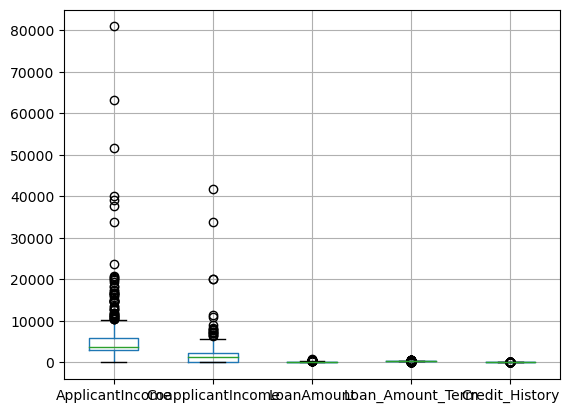

In [7]:
df.boxplot()

In [8]:
def remove_outlier(col):
    sorted(col)
    q1,q3 =col.quantile([0.25,0.75])
    IQR =q3-q1
    lwr_bound =q1-(1.5*IQR)
    upr_bound =q3+(1.5*IQR)
    return lwr_bound,upr_bound

In [9]:
low,high=remove_outlier(df["CoapplicantIncome"])

In [10]:
df["CoapplicantIncome"]=np.where(df["CoapplicantIncome"]>high,high,df["CoapplicantIncome"])

In [11]:
df["CoapplicantIncome"]=np.where(df["CoapplicantIncome"]<low,low,df["CoapplicantIncome"])

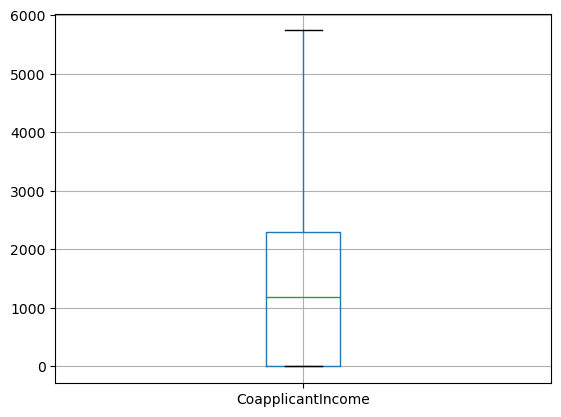

In [12]:
df.boxplot(column="CoapplicantIncome")
plt.show()

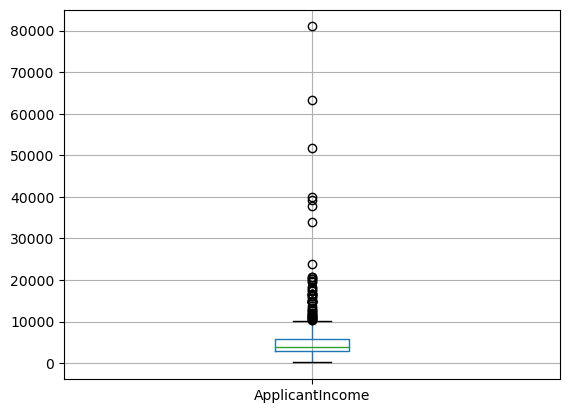

In [13]:
df.boxplot(column="ApplicantIncome")
plt.show()

In [14]:
def remove_outlier(col):
    sorted(col)
    q1,q3 =col.quantile([0.25,0.75])
    IQR =q3-q1
    lwr_bound =q1-(1.5*IQR)
    upr_bound =q3+(1.5*IQR)
    return lwr_bound,upr_bound

In [15]:
low,high=remove_outlier(df["ApplicantIncome"])

In [16]:
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]>high,high,df["ApplicantIncome"])

In [17]:
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]<low,low,df["ApplicantIncome"])

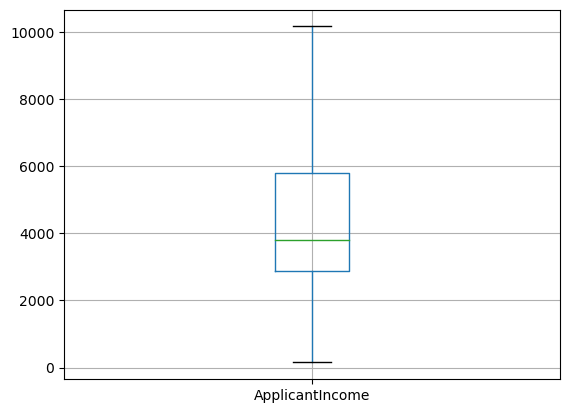

In [18]:
df.boxplot(column="ApplicantIncome")
plt.show()

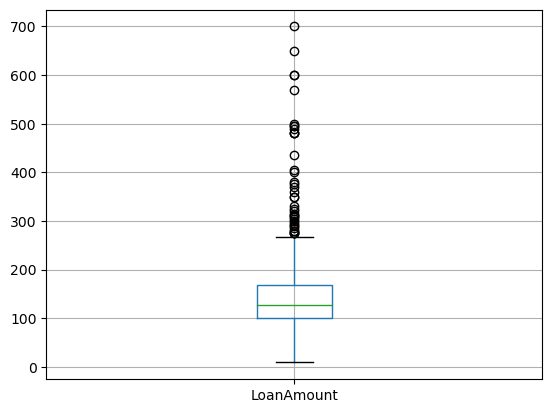

In [24]:
df.boxplot(column="LoanAmount")
plt.show()

In [25]:
low,high=remove_outlier(df["LoanAmount"])

In [26]:
df["LoanAmount"]=np.where(df["LoanAmount"]>high,high,df["LoanAmount"])

In [27]:
df["LoanAmount"]=np.where(df["LoanAmount"]<low,low,df["LoanAmount"])

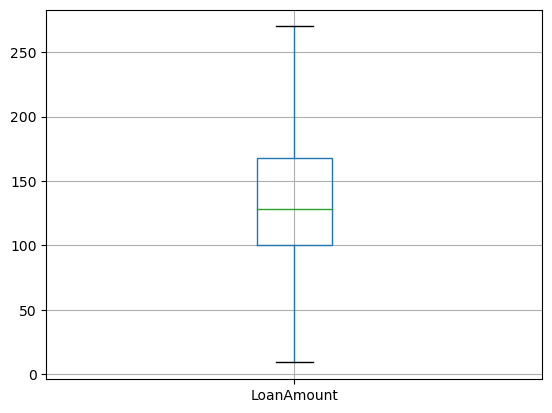

In [33]:
df.boxplot(column="LoanAmount")
plt.show()

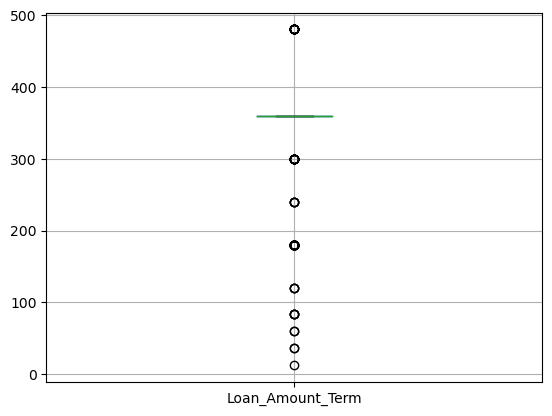

In [34]:
df.boxplot(column="Loan_Amount_Term")
plt.show()

In [35]:
low,high=remove_outlier(df["Loan_Amount_Term"])

In [36]:
df["Loan_Amount_Term"]=np.where(df["Loan_Amount_Term"]>high,high,df["Loan_Amount_Term"])

In [37]:
df["Loan_Amount_Term"]=np.where(df["Loan_Amount_Term"]<low,low,df["Loan_Amount_Term"])


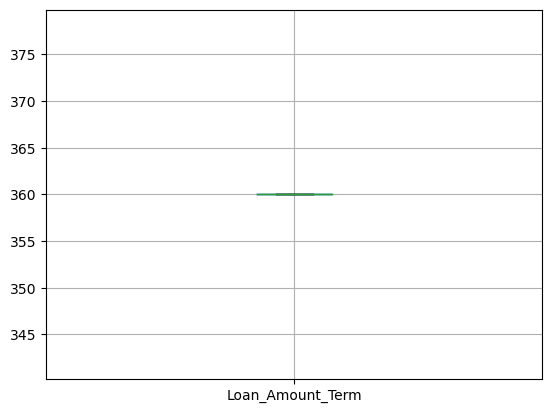

In [38]:
df.boxplot(column="Loan_Amount_Term")
plt.show()

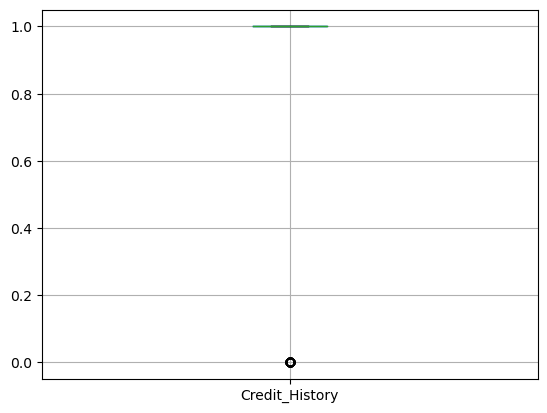

In [42]:
df.boxplot(column="Credit_History")
plt.show()

In [43]:
df["Credit_History"]=np.where(df["Credit_History"]>high,high,df["Credit_History"])

In [44]:
df["Credit_History"]=np.where(df["Credit_History"]<low,low,df["Credit_History"])

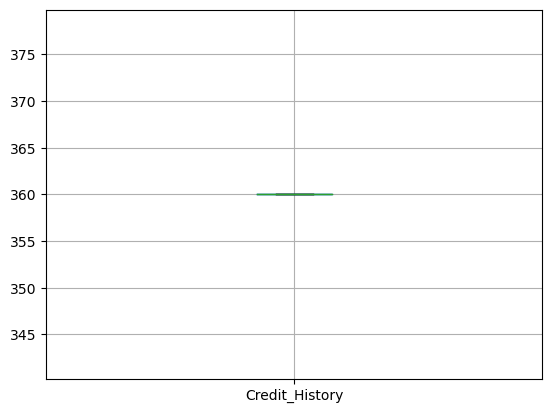

In [45]:
df.boxplot(column="Credit_History")
plt.show()